In [31]:
import numpy as np
import sys
sys.path.append("/home2/ebrahim/beyond-brainscore/analyze_results/figures_code")
from trained_untrained_results_funcs import find_best_layer, elementwise_max, custom_add_2d, load_perf, loop_through_datasets
from untrained_results_funcs import load_untrained_data
from plotting_functions import plot_across_subjects, load_into_3d, save_nii, plot_2d_hist_scatter_updated
from matplotlib import pyplot as plt
from stats_funcs import compute_paired_ttest
import pandas as pd
import seaborn as sns
from nilearn import plotting
import matplotlib

resultsPath_base = '/data/LLMs/brainscore/'
figurePath = 'figures/new_figures/figure4/'

br_labels_dict = {}
num_vox_dict = {}
subjects_dict = {}

data_processed_folder_pereira = f'/data/LLMs/data_processed/pereira/dataset'
data_processed_folder_fed = f'/data/LLMs/data_processed/fedorenko/dataset'
data_processed_folder_blank = f'/data/LLMs/data_processed/blank/dataset'

for e in ['243', '384']:

    bre = np.load(f'{data_processed_folder_pereira}/networks_{e}_lang.npy', allow_pickle=True)
    br_labels_dict[e] = bre
    num_vox_dict[e] = bre.shape[0]
    subjects_dict[e] = np.load(f"{data_processed_folder_pereira}/subjects_{e}_lang.npy", allow_pickle=True)
    
lang_indices_384 = np.argwhere(br_labels_dict['384'] == 'language').squeeze()
lang_indices_243 = np.argwhere(br_labels_dict['243'] == 'language').squeeze()
lang_indices_dict = {}
lang_indices_dict['384'] = lang_indices_384
lang_indices_dict['243'] = lang_indices_243

subjects_arr_fed  = np.load(f"{data_processed_folder_fed}/subjects.npy", allow_pickle=True)
subjects_arr_blank  = np.load(f"{data_processed_folder_blank}/subjects.npy", allow_pickle=True)
subjects_arr_pereira = np.load(f"{data_processed_folder_pereira}/subjects_complete_lang.npy", allow_pickle=True)
subjects_dict_all = {'pereira': subjects_dict, 'fedorenko': subjects_arr_fed, 'blank': subjects_arr_blank}

networks_dict_all = {'pereira': br_labels_dict, 'fedorenko': np.repeat('language', len(subjects_arr_fed)), 
                      'blank': np.repeat('language', len(subjects_arr_blank))}




In [44]:
def load_model_data_into_df(model_names, plot_names, dataset_list, exp_list, 
                            subjects_dict, networks_dict, perf):

    results = {'perf':[], 'subjects': [], 'Network': [], 
                                        'Model': []}
    
    if dataset_list[0] == 'pereira':
        results['Exp'] = []
        
    for mn, pn, dataset, exp in zip(model_names, plot_names, dataset_list, exp_list):
        model_res = np.load(f"/data/LLMs/brainscore/results_{dataset}/{dataset}_{mn}.npz")[perf]
            
        subjects = subjects_dict[dataset]
        networks = networks_dict[dataset]

        if len(exp) > 0:
            subjects = subjects[exp]
            networks = networks[exp]
                
        results['perf'].extend(model_res)
        results['subjects'].extend(subjects)
        results['Network'].extend(networks)
        results['Model'].extend(np.repeat(pn, len(model_res)))
        if dataset == 'pereira':
            results['Exp'].extend(np.repeat(exp.strip('_'), len(model_res)))

    return pd.DataFrame(results)

In [53]:
model_names_pereira = ['trained-var-par_384-sp_WN+pos_1_384', 'trained-var-par_243-sp_WN+pos_1_243', 
                       'trained-var-par_384-sp_glove_1_384', 'trained-var-par_243-sp_glove_1_243', 
                       'trained-var-par_384-sp_WN+pos+glove_1000_384', 'trained-var-par_243-sp_WN+pos+glove_1000_243', 
                        'gpt2xl-syntax-sp_layer_16_1_384', 'gpt2xl-syntax-sp_layer_7_1_243',
                       'syntax-sp_PWR_384_layer1_1000_384', 'syntax-sp_PWR_243_layer1_1000_243']

plot_names_pereira = ['PWR', 'PWR', 'GloVe', 'GloVe', 'GloVe+PWR', 'GloVe+PWR', 'Syntax', 'Syntax', 'Syntax+PWR', 'Syntax+PWR']

exp_list = ['384', '243', '384', '243', '384', '243', '384', '243', '384', '243', '384', '243']
dataset_list = np.repeat(['pereira'], len(exp_list))
perf = 'out_of_sample_r2'

PWR
PWR
GloVe
GloVe
GloVe+PWR
GloVe+PWR
Syntax
Syntax
Syntax+PWR
Syntax+PWR
Taking mean value across voxels with a participant


/home2/ebrahim/miniconda3/envs/llm_brain/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


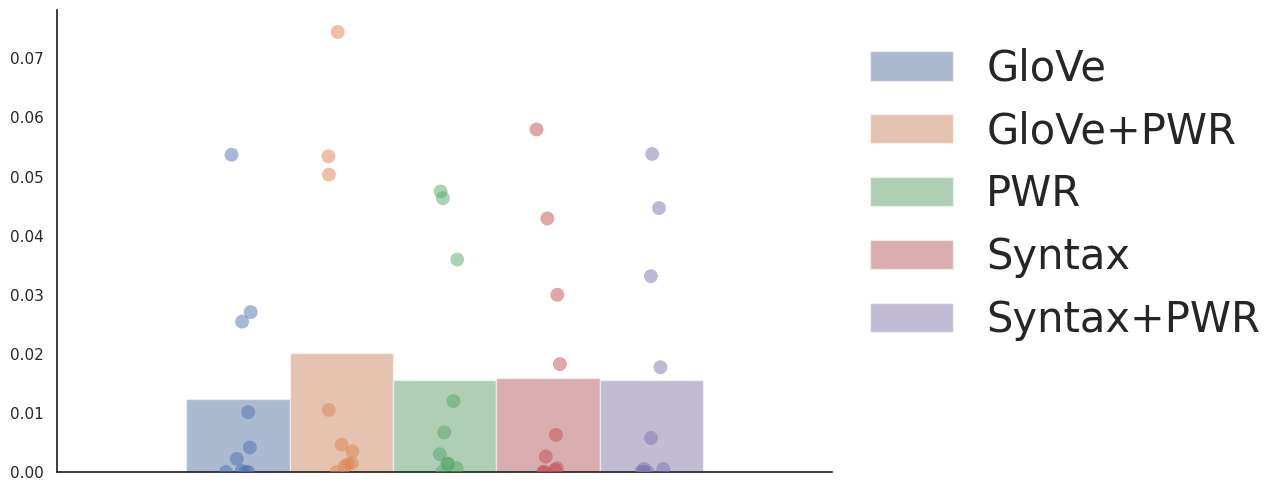

In [57]:
results_pereira = load_model_data_into_df(model_names_pereira, plot_names_pereira, dataset_list=dataset_list, exp_list=exp_list, 
                            subjects_dict=subjects_dict_all, networks_dict=networks_dict_all, perf=perf)


clip_zero = True


fig, ax = plt.subplots(1,1,figsize=(10,6))
subject_avg_pd, dict_pd_merged, dict_pd_with_all = plot_across_subjects(results_pereira, figurePath=figurePath,  selected_networks=['language'],
                                                        dataset=d, saveName=f'{d}', order=['language'], clip_zero=clip_zero, 
                                                        draw_lines=False, ms=10, plot_legend=True,  
                                                        plot_legend_under=False, width=0.7, median=False, ylabel_str='', legend_fontsize=30, ax_select=ax,
                                                        remove_yaxis=False, plot_xlabel=False, alpha=0.5)